# Air emittance blow up

Residual gas act as a distributed thin scatterer.
Pure nitrogen (N2) at pressure P has radiation length $L_{rad, N_{2}} = 327 m$
The thickness traversed by the beam in time t is $L=\beta_{p}ct$

## $\theta_{rms} = \frac{13.6 MeV/c}{p\beta_{c}}q_{p} \sqrt{ \frac{L}{L_{rad}} } (1+\delta_{corr})$

In [1]:
# Run this script on SWAN !

import numpy as np
import math
import matplotlib.pyplot as plt
from cpymad.madx import Madx
from os import walk
import pandas as pd
import pickle
from pybt.tools.plotters import *
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# import jpype
# jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
def beam_size(beta, dispersion, eps, dpp, n):
    """
    Simple calculation of beam size
    """
    beam = np.sqrt(eps*beta + (dpp*dispersion)**2)
    return beam*n

In [3]:
beta = 0.98
momentum = 1060e3 #MeV
q = 68
L = 0.08
L_rad = 8.9

In [4]:
theta_rms = (13.6/(momentum*beta))*(q)*np.sqrt(L/L_rad)#*(1+0.038*np.log(L/L_rad))
print(round(theta_rms,7),"rad")

8.44e-05 rad


## $ \Delta\epsilon_{k\sigma} = \frac{1}{2}(k\theta_{rms})^{2}\beta_{x} $

In [5]:
epsilon = (1/2)*(1*theta_rms)**2*23
print(round(epsilon,9), "pi rad m")

8.2e-08 pi rad m


## Normalised r.m.s emittance $\Delta\epsilon_{rms}\beta\gamma$

In [6]:
gamma = np.sqrt(1/(1-beta**2))

In [7]:
epsilon_norm = epsilon*beta*gamma
print(round(epsilon_norm,8), "pi rad m")

4e-07 pi rad m


# Hydrogen jet target

In [8]:
beta = 0.55
momentum = 0.61e3 #MeV
q = -1
L = 1.3e-13
L_rad = 63

In [9]:
theta_rms = (14/(momentum*beta))*(q)*np.sqrt(L/L_rad)
print(round(theta_rms,10),"rad")

-1.9e-09 rad


# Scattering on residual gas

In [10]:
p = 100 #MeV/c
beta_rel = 0.1
beta = 10
q=1
c = 0.3e9
t=27*60*60
L = beta_rel*c*t
L_rad = 2.3e17

In [11]:
theta_rms = (13.6/(p*beta_rel))*(q)*np.sqrt(L/L_rad)
print(round(theta_rms,7),"rad")

0.0048425 rad


In [12]:
k=1
beta_average = 10

In [13]:
Delta_epsilon = (1/2)*k**2*q**2*(14/(p*beta_rel))**2*beta_average*(L/L_rad)
print(Delta_epsilon)

0.00012424695652173912


# From Matthew's script

In [14]:
k=1
q=1
betx = (22+11)/2
L = 628.3185 #PS
Nturns = 600000
N = np.arange(1,Nturns+1,1)
L = np.ones(Nturns)*628.3185
P=1e-3*1e-9 # PS rest gas: H2 @ 1e-9 mbar over circumference. Pressure must be in bar
L_rad = 7500./(P*750/760)

gamma_rel = 2.0/0.938 + 1
beta_rel = np.sqrt(1 - 1/gamma_rel**2)
emit_0=2e-6/(beta_rel*gamma_rel)
p = gamma_rel*beta_rel*0.938

In [15]:
dEmit = (1/2)*k**2*q**2 * (14e-3/p/beta_rel)**2*betx*L/L_rad
dEmit

array([1.92022593e-17, 1.92022593e-17, 1.92022593e-17, ...,
       1.92022593e-17, 1.92022593e-17, 1.92022593e-17])

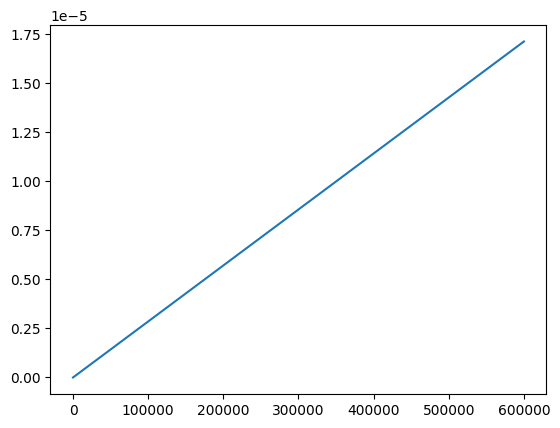

In [16]:
N = np.arange(1,Nturns+1,1)
fig, ax = plt.subplots()
ax.plot(N, np.cumsum(dEmit)/emit_0)
# plt.semilogx()
# plt.semilogy()

In [17]:
def Lrad(P,gas='N2'):
    if gas == 'Ar':
        Lrad0 = 118.      
    elif gas == 'H2':
        Lrad0 = 7500. 
    else:
        Lrad0 = 327. # N2      
    return Lrad0/(P*750/760)

def dEmit(betx,L,L_rad,T=2.0,q=1.,k=1.):
    gamma_rel = T/0.938 + 1
    beta_rel = np.sqrt(1 - 1/gamma_rel**2)
    p = gamma_rel*beta_rel*0.938
   
    return 0.5*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad

Text(0.5, 1.0, 'Blow-up along 1.2 s flat-bottom for 2 GeV p+ ($\\epsilon_0 = 2$ $\\mu$m)')

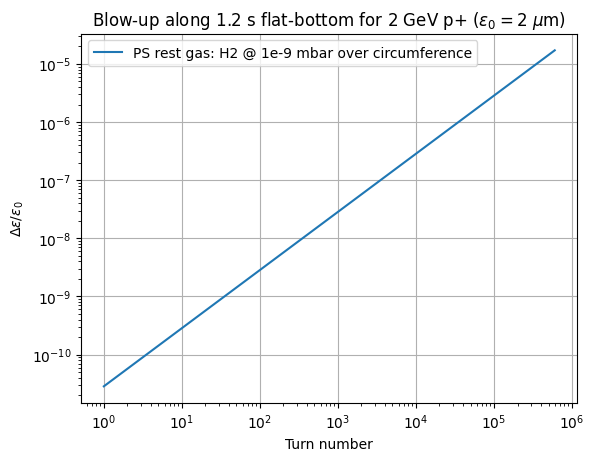

In [18]:
Nturns = 600000
L_BGI = np.ones(Nturns)*10.88
L_PS = np.ones(Nturns)*628.3185
N = np.arange(1,Nturns+1,1)

gamma_rel = 2.0/0.938 + 1
beta_rel = np.sqrt(1 - 1/gamma_rel**2)
emit_0=2e-6/(beta_rel*gamma_rel)

plt.figure()
plt.plot(N,np.cumsum(dEmit((22+11)/2,L_PS,Lrad(1e-3*1e-9,gas='H2')))/emit_0, label = "PS rest gas: H2 @ 1e-9 mbar over circumference")
plt.semilogx()
plt.semilogy()
plt.grid()
plt.legend()
plt.xlabel("Turn number")
plt.ylabel(r"$\Delta\epsilon/\epsilon_0$")
plt.title(r"Blow-up along 1.2 s flat-bottom for 2 GeV p+ ($\epsilon_0 = 2$ $\mu$m)")

# In the T8 transfer line

https://uspas.fnal.gov/materials/12MSU/rellect.pdf
* $\beta_{rel}=\frac{v}{c}$
* $\gamma_{rel}=\frac{1}{\sqrt{1-\beta^{2}}}$
* $E_{total}=E_{rest}+T$
* $ \gamma=\frac{E_{tot}}{E_{rest}}$
* $E_{total}=\gamma m_{0}c^{2}$
* $p=\gamma m_{0} \beta c$

In [19]:
q = 1 # Charge of a proton
k = 1 # Number of sigma
P = 1.01325 # Standard air pressure at sea level in Bar
P_Torr = P*750.062 # Standard air pressure at sea level in Torr
L_rad0 = 301 # For air. Table with radiation lengths: https://cds.cern.ch/record/941314/files/p245.pdf
L_rad = L_rad0/(P_Torr/760)
L = 1 # m
betx = 120 # Roughly this at IRRAD with parallel beam optic
E_Tot = 24 # Beam total energy in GeV
E_rest = 0.93826 # Rest mass of proton in GeV 
T = E_Tot - E_rest # Beam kinetic energy in GeV
gamma_rel = 1 + (T/E_rest)
beta_rel = np.sqrt(1 - 1/gamma_rel**2)
p = gamma_rel*beta_rel*0.938

exn = 4.92e-06 # Normalised emittance
ex_0 = exn/(beta_rel*gamma_rel)

$ \Delta\epsilon_{k\sigma} = \frac{1}{2}k^{2}q^{2}(\frac{14\cdot10^{-3}}{p\beta_{rel}})^2\beta_{x}\frac{L}{L_{rad}}$
with energies in units of GeV

$L_{rad}=\frac{L_{rad0}}{P/760}$

In [20]:
# For a 1 m gas length
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad
Delta_Emit/ex_0

0.35365400897556315

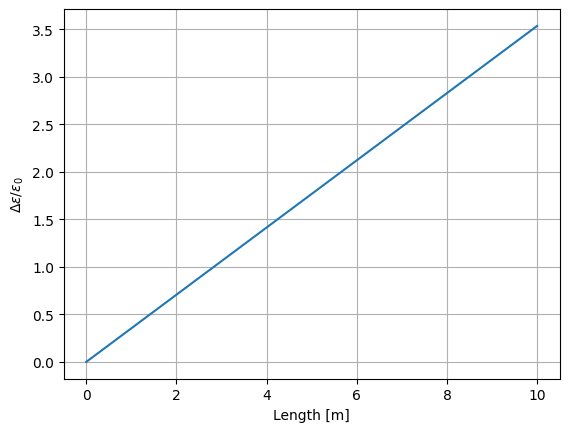

In [21]:
# Over 10 m
L = np.linspace(0,10,100)
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad

fig, ax = plt.subplots()
ax.plot(L, np.array(Delta_Emit)/ex_0)
# ax.plot(L, np.ones(len(L))*ex_0)
ax.set_xlabel("Length [m]")
ax.set_ylabel(r"$\Delta\epsilon/\epsilon_{0}$")
ax.grid()

## Open the measurements and quad strength for parallel beam optic

In [22]:
start_path = "/eos/user/e/eljohnso/SWAN_projects/quad-scan-east/"
end_path = "quad_scan_t8_bpms_data"
mypath = start_path+"/"+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
subset_dirnames = [dirnames[3]]
subset_dirnames
for dirname in subset_dirnames:
    print (dirname)
    infile = open(start_path+end_path+"/"+dirname+"/"+dirname+".p", 'rb')
    loaded_pickle = pickle.load(infile)

df = pd.DataFrame(data = {})
                          
for j in range(len(loaded_pickle[0])):
    df2 = pd.DataFrame(data = {"time": loaded_pickle[0][j],
                               "intensity": [loaded_pickle[3][j]],
                               "meas_pulse_qfn01": loaded_pickle[1]['F61.QFN01/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qdn02": loaded_pickle[1]['F61.QDN02/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qfn03": loaded_pickle[1]['F61.QFN03/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qdn04": loaded_pickle[1]['F61.QDN04/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qfn05": loaded_pickle[1]['T8.QFN05/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qdn06": loaded_pickle[1]['T8.QDN06/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qdn07": loaded_pickle[1]['T8.QDN07/MEAS.PULSE#VALUE'][j],
                               "meas_pulse_qfn08": loaded_pickle[1]['T8.QFN08/MEAS.PULSE#VALUE'][j],
                               "k_qfn01": loaded_pickle[2]['logical.F61.QFN01/K_FUNC_LIST#value'][j][0][1][0],
                               "k_qdn02": loaded_pickle[2]["logical.F61.QDN02/K_FUNC_LIST#value"][j][0][1][0],
                               "k_qfn03": loaded_pickle[2]["logical.F61.QFN03/K_FUNC_LIST#value"][j][0][1][0],
                               "k_qdn04": loaded_pickle[2]['logical.F61.QDN04/K_FUNC_LIST#value'][j][0][1][0],
                               "k_qfn05": loaded_pickle[6]["logical.T8.QFN05/K_FUNC_LIST#value"][j][0][1][0],
                               "k_qdn06": loaded_pickle[6]["logical.T8.QDN06/K_FUNC_LIST#value"][j][0][1][0],
                               "k_qdn07": loaded_pickle[6]["logical.T8.QDN07/K_FUNC_LIST#value"][j][0][1][0],
                               "k_qfn08": loaded_pickle[6]["logical.T8.QFN08/K_FUNC_LIST#value"][j][0][1][0],
                                "mwpc_HSigma": loaded_pickle[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][j]["HSigma"],
                                "mwpc_VSigma": loaded_pickle[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions'][j]["VSigma"],
                               "bpm01H": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions'][j]["HSigma"],
                               "bpm01V": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions'][j]["VSigma"],
                               "bpm02H": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions'][j]["HSigma"],
                               "bpm02V": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_02/Positions'][j]["VSigma"],
                               "bpm03H": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions'][j]["HSigma"],
                               "bpm03V": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_03/Positions'][j]["VSigma"],
                               "bpm04H": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions'][j]["HSigma"],
                               "bpm04V": loaded_pickle[7]['PS-LOG-BPM-IRRAD-UCAP_BPM_04/Positions'][j]["VSigma"],
                              })

    df = pd.concat([df,df2])
df.reset_index(drop=True, inplace=True)

NameError: name 'dirnames' is not defined

## Run a twiss with parallel beam optics

In [ ]:
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.str")
madx.call("/eos/home-e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/f61t8/f61t8_op.seq")

ex = exn/(beta*gamma)
ex_0 = ex
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc="24",ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')


madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx.input('SEQEDIT, SEQUENCE=f61t8_op;')
madx.input('FLATTEN;')
madx.input('REMOVE, ELEMENT=ARBMATRIX;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.input("F62.BTV002 : MARKER;")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.command.install(element = 'F62.BTV002', at=1.250107+0.406, from_="F61.MBXHD033")
madx.input('FLATTEN;')
madx.input('ENDEDIT;')

madx.use(sequence="f61t8_op")

# Initial dipole strengths
madx.input("kBHZ1 = -0.044108;")
madx.input("kBHZ2 = 0.045318;")
madx.input("kBHZ3 = 0.022599;")
madx.input("kBHZ4 = -0.03492;")
madx.input("kBHZ5 = -0.038;")


# Computed quad strength with values from 2021-11-12
madx.input("kQFN1 = "+str(df.iloc[10].k_qfn01)+";")
madx.input("kQDN2 = "+str(df.iloc[10].k_qdn02)+";")
madx.input("kQFN3 = "+str(df.iloc[10].k_qfn03)+";")
madx.input("kQDN4 = "+str(df.iloc[10].k_qdn04)+";")
madx.input("kQFN5 = "+str(df.iloc[10].k_qfn05)+";")
madx.input("kQDN6 = "+str(df.iloc[10].k_qdn06)+";")
madx.input("kQDN7 = "+str(df.iloc[10].k_qdn07)+";")
madx.input("kQFN8 = "+str(df.iloc[10].k_qfn08)+";")
twiss_f61 = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

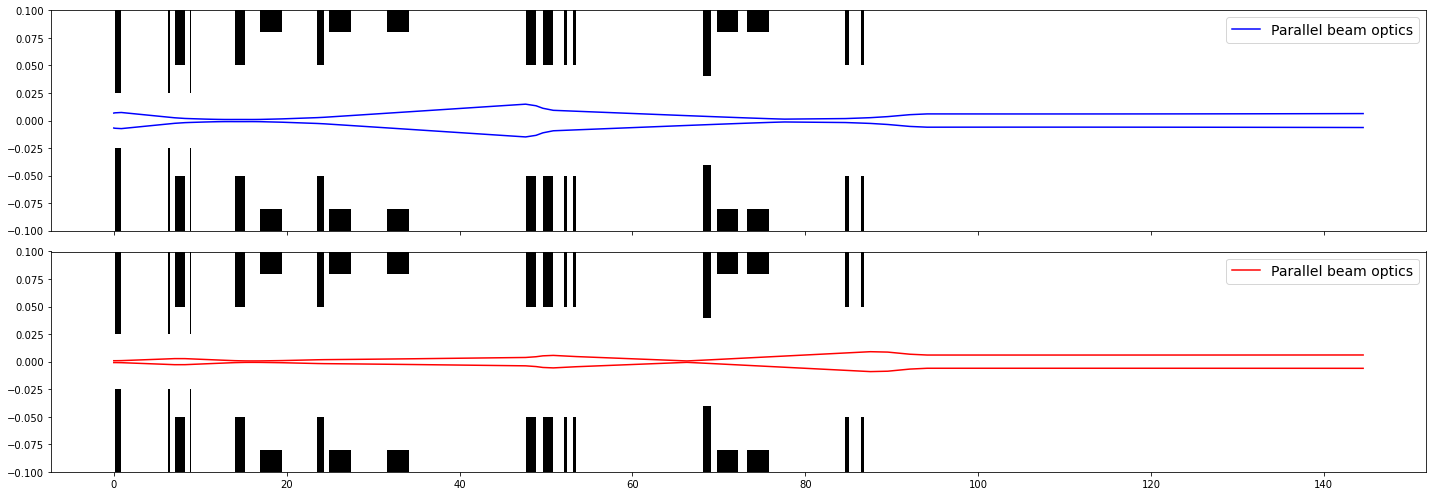

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20, 7), tight_layout=True, sharex=True)
n_sigma=1
draw_aperture(ax[0], twiss_f61, 'aper_1')
ax[0].plot(twiss_f61['s'], beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, n_sigma), alpha=1.0, color ="b", zorder=0, label="Parallel beam optics")
ax[0].plot(twiss_f61['s'], -beam_size(twiss_f61['betx'], twiss_f61['dx'], ex, sige, n_sigma), alpha=1.0, color ="b", zorder=0)

ax[0].set_ylim(-0.1, 0.1)
ax[0].legend(fontsize=14, loc="upper right")

draw_aperture(ax[1], twiss_f61, 'aper_1')
ax[1].plot(twiss_f61['s'], beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, n_sigma), alpha=1.0, color ="r", zorder=0, label="Parallel beam optics")
ax[1].plot(twiss_f61['s'], -beam_size(twiss_f61['bety'], twiss_f61['dy'], ey, sige, n_sigma), alpha=1.0, color ="r", zorder=0)

ax[1].set_ylim(-0.1, 0.1)
ax[1].legend(fontsize=14, loc="upper right")

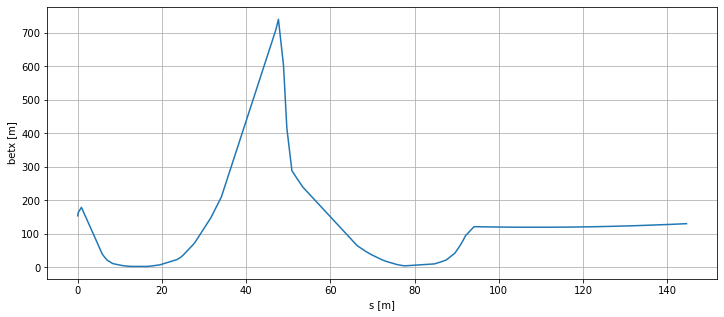

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(twiss_f61.s, twiss_f61.betx)
ax.set_xlabel("s [m]")
ax.set_ylabel("betx [m]")
ax.grid()

### Mattermost discussion from Andreas with length where beam travels through air
* The last 50cm of "Drift_1"
* From the downstream end of "F61.BCTF022" to 30cm downstream of "F61.MBXHD025"
* From the downstream end of "Drift37" to "T08.BPM073"
* 4.11m upstream of "T08.BPM080" to "T08.BPM092"
* From 15cm upstream of "T08.XION94" all the way until the CHARM dump

### Let's neglect the emittance growth in F61 as they are ~small and calculate the emittance growth at the first BPM01

In [ ]:
# lists to record beam sizes
list_0 = []
list_scattered = []

In [ ]:
L = twiss_f61.s["t08.bpm073"] - twiss_f61.s["drift_37[0]"]
print(f"Air length before BPM01: {round(L,2)} [m]")
betx = twiss_f61.betx["t08.bpm073"]
print(f"betx at BPM01: {round(betx,2)}")
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad
print(f"The emittance growth at the BPM01 is: {round(Delta_Emit,9)}")
ex = ex_0 + Delta_Emit
print(f"Emittance is now: {round(ex,8)}")
print("")
sigH = beam_size(twiss_f61['betx']["t08.bpm073"], twiss_f61['dx']["t08.bpm073"], ex_0, sige, 1)*1000
list_0.append(sigH)
print(f"Original beam size: {round(sigH,2)} [mm]")
sigH = beam_size(twiss_f61['betx']["t08.bpm073"], twiss_f61['dx']["t08.bpm073"], ex, sige, 1)*1000
list_scattered.append(sigH)
print(f"Scattered beam size: {round(sigH,2)} [mm]")

Air length before BPM01: 1.32 [m]
betx at BPM01: 120.99
The emittance growth at the BPM01 is: 9.1e-08
Emittance is now: 3.9e-07

Original beam size: 6.01 [mm]
Scattered beam size: 6.87 [mm]


## Now for BPM02

In [ ]:
L = 4.11
print(f"Air length before BPM02: {round(L,2)} [m]")
betx = twiss_f61.betx["t08.bpm080"]
print(f"betx at BPM02: {round(betx,2)}")
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad
print(f"The emittance growth at the BPM02 is: {round(Delta_Emit,9)}")
ex = ex + Delta_Emit
print(f"Emittance is now: {round(ex,8)}")
print("")
sigH = beam_size(twiss_f61['betx']["t08.bpm080"], twiss_f61['dx']["t08.bpm080"], ex_0, sige, 1)*1000
list_0.append(sigH)
print(f"Original beam size: {round(sigH,2)} [mm]")
sigH = beam_size(twiss_f61['betx']["t08.bpm080"], twiss_f61['dx']["t08.bpm080"], ex, sige, 1)*1000
list_scattered.append(sigH)
print(f"Scattered beam size: {round(sigH,2)} [mm]")

Air length before BPM02: 4.11 [m]
betx at BPM02: 120.01
The emittance growth at the BPM02 is: 2.8e-07
Emittance is now: 6.7e-07

Original beam size: 5.99 [mm]
Scattered beam size: 8.96 [mm]


### at BPM04

In [ ]:
L = twiss_f61.s["t08.bpm092"] - twiss_f61.s["t08.bpm080"]
print(f"Air length before BPM04: {round(L,2)} [m]")
betx = twiss_f61.betx["t08.bpm092"]
print(f"betx at BPM04: {round(betx,2)}")
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad
print(f"The emittance growth at the BPM04 is: {round(Delta_Emit,9)}")
ex = ex + Delta_Emit
print(f"Emittance is now: {round(ex,8)}")
print("")
sigH = beam_size(twiss_f61['betx']["t08.bpm092"], twiss_f61['dx']["t08.bpm092"], ex_0, sige, 1)*1000
list_0.append(sigH)
print(f"Original beam size: {round(sigH,2)} [mm]")
sigH = beam_size(twiss_f61['betx']["t08.bpm092"], twiss_f61['dx']["t08.bpm092"], ex, sige, 1)*1000
list_scattered.append(sigH)
print(f"Scattered beam size: {round(sigH,2)} [mm]")

Air length before BPM04: 12.16 [m]
betx at BPM04: 120.46
The emittance growth at the BPM04 is: 8.31e-07
Emittance is now: 1.5e-06

Original beam size: 6.01 [mm]
Scattered beam size: 13.45 [mm]


### at MWPC

In [ ]:
L = 0.15 + (twiss_f61.s["t08.xwcm103"] - twiss_f61.s["t08.xion094"])
print(f"Air length before MWPC: {round(L,2)} [m]")
betx = twiss_f61.betx["t08.xwcm103"]
print(f"betx at MWPC: {round(betx,2)}")
Delta_Emit = (1/2)*k**2*q**2*(14e-3/p/beta_rel)**2*betx*L/L_rad
print(f"The emittance growth at the MWPC is: {round(Delta_Emit,9)}")
ex = ex + Delta_Emit
print(f"Emittance is now: {round(ex,8)}")
print("")
sigH = beam_size(twiss_f61['betx']["t08.xwcm103"], twiss_f61['dx']["t08.xwcm103"], ex_0, sige, 1)*1000
list_0.append(sigH)
print(f"Original beam size: {round(sigH,2)} [mm]")
sigH = beam_size(twiss_f61['betx']["t08.xwcm103"], twiss_f61['dx']["t08.xwcm103"], ex, sige, 1)*1000
list_scattered.append(sigH)
print(f"Scattered beam size: {round(sigH,2)} [mm]")

Air length before MWPC: 9.76 [m]
betx at MWPC: 123.56
The emittance growth at the MWPC is: 6.84e-07
Emittance is now: 2.18e-06

Original beam size: 6.11 [mm]
Scattered beam size: 16.44 [mm]


Text(0.5, 1.0, 'Air scattering in IRRAD, Horizontal plane')

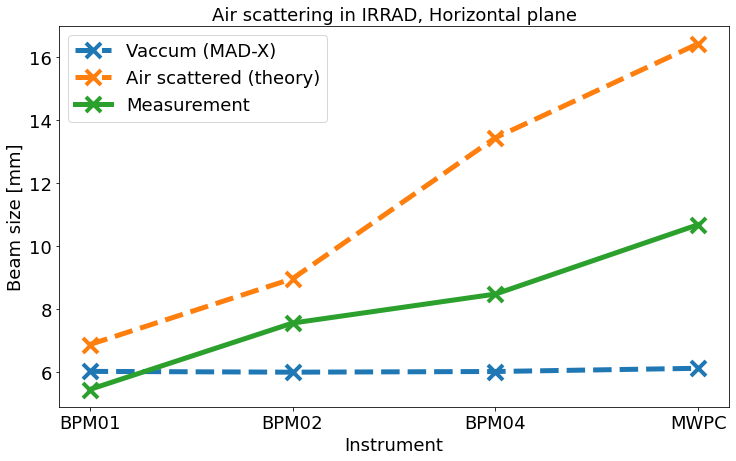

In [ ]:
x = ["BPM01", "BPM02", "BPM04", "MWPC"]
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x, list_0, marker="x", lw=5, markersize=15, mew=4, ls="--", label="Vaccum (MAD-X)")
ax.plot(x, list_scattered, marker="x", markersize=15, mew=4, lw=5, ls="--",  label="Air scattered (theory)")
ax.plot(x, [5.4360277838869235, 7.5495358331111255, 8.472393139789189, 10.682260205428946], marker="x", markersize=15, mew=4, lw=5, label="Measurement")
ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel("Instrument", fontsize=18)
ax.set_ylabel("Beam size [mm]", fontsize=18)
ax.set_title("Air scattering in IRRAD, Horizontal plane", fontsize=18)